In [4]:
#importing libraires

from fastcore.all import *
import os
import time

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
urls = search_images('bear photos', max_images=1)
urls[0]

Searching for 'bear photos'


'https://photography-workshops.directory/wp-content/uploads/job-manager-uploads/featured_image/2019/08/lakeclark-alaska-bears-4789.jpg'

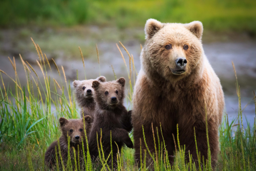

In [6]:
from fastdownload import download_url
dest = 'bear.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'teddy bear photos'


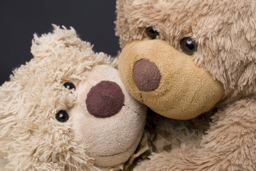

In [7]:
download_url(search_images('teddy bear photos', max_images=1)[0], 'teddy_bear.jpg', show_progress=False)
Image.open('teddy_bear.jpg').to_thumb(256,256)

In [9]:
searches = 'teddy_bear','bear'
path = Path('bear_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'teddy_bear photo'
Searching for 'teddy_bear sun photo'
Searching for 'teddy_bear shade photo'
Searching for 'bear photo'
Searching for 'bear sun photo'
Searching for 'bear shade photo'


/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

17

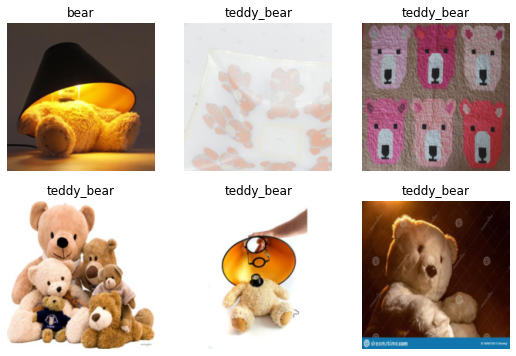

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.573763,0.381204,0.079646,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.255943,0.323266,0.075221,00:03
1,0.199420,0.316099,0.053097,00:03
2,0.167971,0.308409,0.075221,00:03
3,0.141263,0.295080,0.075221,00:03


In [13]:
is_bear,_,probs = learn.predict(PILImage.create('bear.jpg'))
print(f"This is a: {is_bear}.")
print(f"Probability it's a bear: {probs[0]:.4f}")

This is a: bear.
Probability it's a bear: 1.0000
